In [1]:
from google.colab import files
uploaded = files.upload()

Saving card_transdata.csv to card_transdata.csv


In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv('card_transdata.csv')
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# Dataset analysis

In [6]:
data.shape

(1000000, 8)

In [7]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [12]:
sum(data['fraud'])

87403.0

In [13]:
sum(data['fraud'] == 0)

912597

In [14]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

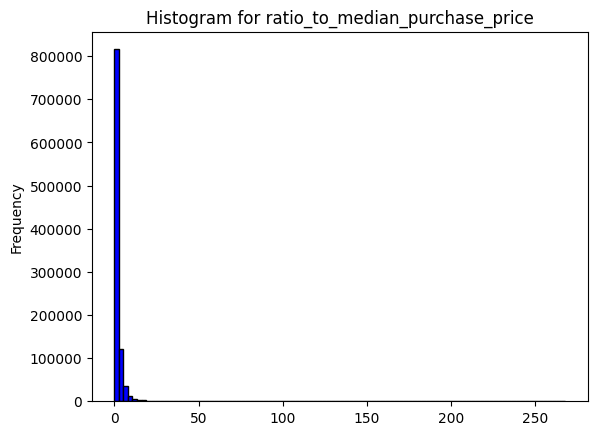

In [30]:
import matplotlib.pyplot as plt
plt.hist(data['ratio_to_median_purchase_price'], bins=100, color='blue', edgecolor='black')
plt.ylabel('Frequency')
plt.title('Histogram for ratio_to_median_purchase_price')
plt.show()

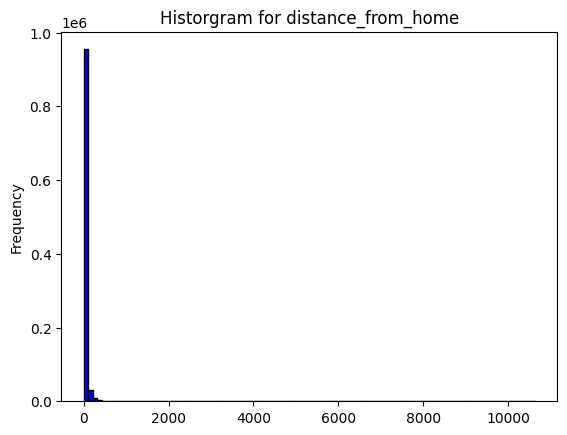

In [31]:
plt.hist(data['distance_from_home'], bins=100, color='blue', edgecolor='black')
plt.ylabel('Frequency')
plt.title ('Historgram for distance_from_home')
plt.show()

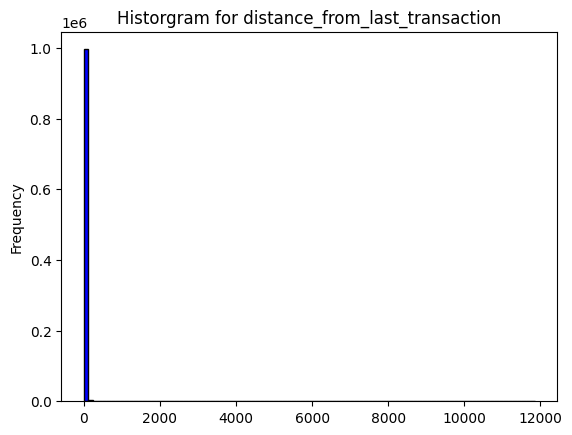

In [32]:
plt.hist(data['distance_from_last_transaction'], bins=100, color='blue', edgecolor='black')
plt.ylabel('Frequency')
plt.title ('Historgram for distance_from_last_transaction')
plt.show()

In [37]:
data['ratio_to_median_purchase_price'].nlargest(10)

470542    267.802942
88431     266.689692
280129    168.137909
956807    146.213898
997803    126.713701
71604     126.294930
56402     124.417850
760457    119.411391
347000    109.869374
417896    105.941301
Name: ratio_to_median_purchase_price, dtype: float64

In [35]:
data['distance_from_home'].nlargest(10)

326661    10632.723672
847723     8777.136420
266995     5797.972589
780353     4823.638452
33705      4601.011222
787413     4420.354374
174622     4394.314607
395167     3986.278366
45642      3981.367512
536804     3716.377730
Name: distance_from_home, dtype: float64

In [36]:
data['distance_from_last_transaction'].nlargest(10)

432691    11851.104565
964356     4968.315477
472444     3437.278746
596199     2938.197853
567609     2724.273459
215130     2663.513077
995529     2222.757993
886450     2172.974944
44453      2160.499922
958804     2120.583025
Name: distance_from_last_transaction, dtype: float64

In [39]:
normalized_data = data
normalized_data['ratio_to_median_purchase_price'] = (data['ratio_to_median_purchase_price'] - data['ratio_to_median_purchase_price'].mean()) / data['ratio_to_median_purchase_price'].std()
normalized_data['distance_from_home'] = (data['distance_from_home'] - data['distance_from_home'].mean()) / data['distance_from_home'].std()
normalized_data['distance_from_last_transaction'] = (data['distance_from_last_transaction'] - data['distance_from_last_transaction'].mean()) / data['distance_from_last_transaction'].std()

In [114]:
# logistic regression
from sklearn.model_selection import train_test_split
X = normalized_data.drop('fraud', axis=1)
y = normalized_data['fraud']

In [115]:
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,0.477882,-0.182849,0.043491,1.0,1.0,0.0,0.0
1,-0.241607,-0.188094,-0.189300,1.0,0.0,0.0,0.0
2,-0.329369,-0.163733,-0.498812,1.0,0.0,0.0,1.0
3,-0.372854,0.021806,-0.522048,1.0,1.0,0.0,1.0
4,0.268572,-0.172968,0.142373,1.0,1.0,0.0,1.0


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [117]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, f1_score
log_ac = accuracy_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred)

print("accuracy: ", log_ac)
print("F1: ", log_f1)

accuracy:  0.958885
F1:  0.7172769468798349


In [118]:
# xgbooster
import xgboost as xgb
params = {'max_depth': 3,'learning_rate': 0.1,}
xgbooster_model = xgb.XGBClassifier(**params)
xgbooster_model.fit(X_train, y_train)
xgbooster_pred = xgbooster_model.predict(X_test)

In [119]:
xgbooster_ac = accuracy_score(y_test, xgbooster_pred)
xgbooster_f1 = f1_score(y_test, xgbooster_pred)

print("accuracy: ", xgbooster_ac)
print("F1: ", xgbooster_f1)

accuracy:  0.997905
F1:  0.9879205466024735


In [78]:
# random forest
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': 100, 'max_depth': 10}
forest_model = RandomForestClassifier(**params)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

In [79]:
forest_ac = accuracy_score(y_test, forest_pred)
forest_f1 = f1_score(y_test, forest_pred)

print("accuracy: ", forest_ac)
print("F1: ", forest_f1)

accuracy:  0.99999
F1:  0.9999425551470588


In [80]:
# Model - tune
normalized_data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [103]:
# select feature
from scipy.stats import chi2_contingency
for i in ['repeat_retailer', 'used_chip','used_pin_number', 'online_order']:
  chi, p, d, e = chi2_contingency(pd.crosstab(normalized_data[i], normalized_data['fraud']))
  print(i, "Chi-squared:", chi)

repeat_retailer Chi-squared: 1.827827480587841
used_chip Chi-squared: 3717.4490433572664
used_pin_number Chi-squared: 10057.412546099067
online_order Chi-squared: 36852.02374794533


In [120]:
X = normalized_data.drop(['repeat_retailer','used_pin_number','fraud'], axis=1)
y = normalized_data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [121]:
params = {'max_depth': 3,'learning_rate': 0.1,}
xgbooster_model = xgb.XGBClassifier(**params)
xgbooster_model.fit(X_train, y_train)
xgbooster_pred = xgbooster_model.predict(X_test)

xgbooster_ac = accuracy_score(y_test, xgbooster_pred)
xgbooster_f1 = f1_score(y_test, xgbooster_pred)

print("new accuracy: ", xgbooster_ac)
print("new F1: ", xgbooster_f1)

new accuracy:  0.9886
new F1:  0.9377966934031756


In [122]:
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,online_order
0,0.477882,-0.182849,0.043491,1.0,0.0
1,-0.241607,-0.188094,-0.189300,0.0,0.0
2,-0.329369,-0.163733,-0.498812,0.0,1.0
3,-0.372854,0.021806,-0.522048,1.0,1.0
4,0.268572,-0.172968,0.142373,1.0,1.0


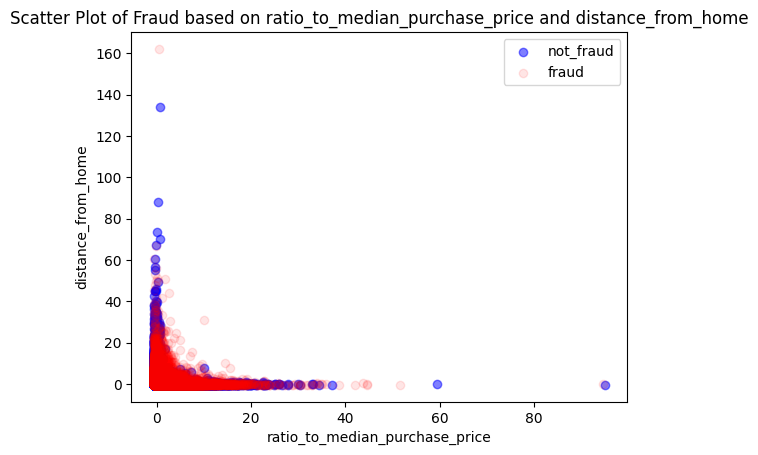

In [131]:
# continous feature
not_fraud = normalized_data[normalized_data['fraud'] == 0]
fraud = normalized_data[normalized_data['fraud'] == 1]

plt.scatter(not_fraud['ratio_to_median_purchase_price'], not_fraud['distance_from_home'], color='blue', label='not_fraud',alpha=0.5)
plt.scatter(fraud['ratio_to_median_purchase_price'], fraud['distance_from_home'], color='red', label='fraud',alpha=0.1)

plt.xlabel('ratio_to_median_purchase_price')
plt.ylabel('distance_from_home')
plt.title('Scatter Plot of Fraud based on ratio_to_median_purchase_price and distance_from_home')

plt.legend()
plt.show()


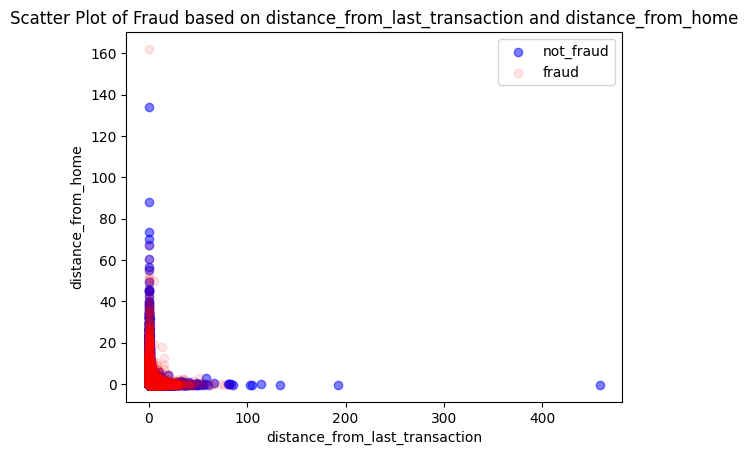

In [132]:
not_fraud = normalized_data[normalized_data['fraud'] == 0]
fraud = normalized_data[normalized_data['fraud'] == 1]

plt.scatter(not_fraud['distance_from_last_transaction'], not_fraud['distance_from_home'], color='blue', label='not_fraud',alpha=0.5)
plt.scatter(fraud['distance_from_last_transaction'], fraud['distance_from_home'], color='red', label='fraud',alpha=0.1)

plt.xlabel('distance_from_last_transaction')
plt.ylabel('distance_from_home')
plt.title('Scatter Plot of Fraud based on distance_from_last_transaction and distance_from_home')

plt.legend()
plt.show()

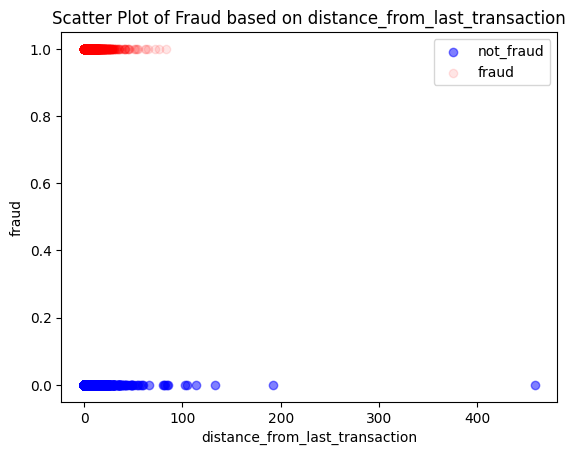

In [133]:
not_fraud = normalized_data[normalized_data['fraud'] == 0]
fraud = normalized_data[normalized_data['fraud'] == 1]

plt.scatter(not_fraud['distance_from_last_transaction'], not_fraud['fraud'], color='blue', label='not_fraud',alpha=0.5)
plt.scatter(fraud['distance_from_last_transaction'], fraud['fraud'], color='red', label='fraud',alpha=0.1)

plt.xlabel('distance_from_last_transaction')
plt.ylabel('fraud')
plt.title('Scatter Plot of Fraud based on distance_from_last_transaction')

plt.legend()
plt.show()

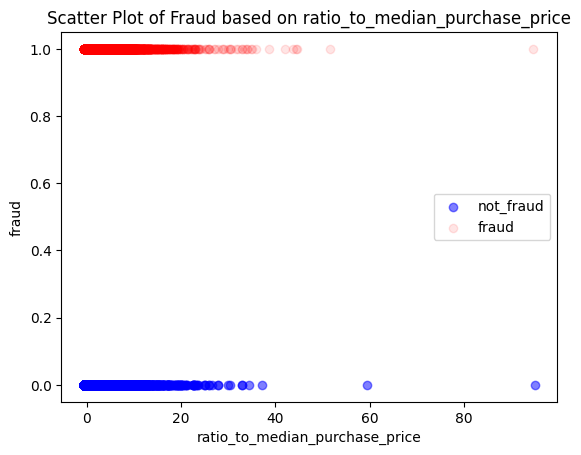

In [134]:
not_fraud = normalized_data[normalized_data['fraud'] == 0]
fraud = normalized_data[normalized_data['fraud'] == 1]

plt.scatter(not_fraud['ratio_to_median_purchase_price'], not_fraud['fraud'], color='blue', label='not_fraud',alpha=0.5)
plt.scatter(fraud['ratio_to_median_purchase_price'], fraud['fraud'], color='red', label='fraud',alpha=0.1)

plt.xlabel('ratio_to_median_purchase_price')
plt.ylabel('fraud')
plt.title('Scatter Plot of Fraud based on ratio_to_median_purchase_price')

plt.legend()
plt.show()

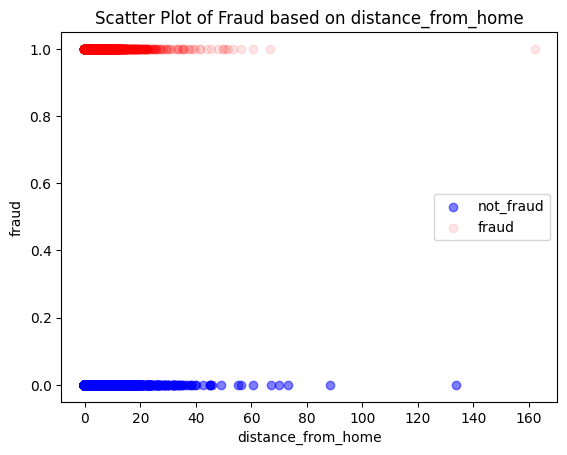

In [135]:
not_fraud = normalized_data[normalized_data['fraud'] == 0]
fraud = normalized_data[normalized_data['fraud'] == 1]

plt.scatter(not_fraud['distance_from_home'], not_fraud['fraud'], color='blue', label='not_fraud',alpha=0.5)
plt.scatter(fraud['distance_from_home'], fraud['fraud'], color='red', label='fraud',alpha=0.1)

plt.xlabel('distance_from_home')
plt.ylabel('fraud')
plt.title('Scatter Plot of Fraud based on distance_from_home')

plt.legend()
plt.show()

In [136]:
X = normalized_data.drop(['distance_from_home','ratio_to_median_purchase_price','distance_from_last_transaction','fraud'], axis=1)
y = normalized_data['fraud']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

params = {'max_depth': 3,'learning_rate': 0.1,}
xgbooster_model = xgb.XGBClassifier(**params)
xgbooster_model.fit(X_train, y_train)
xgbooster_pred = xgbooster_model.predict(X_test)

xgbooster_ac = accuracy_score(y_test, xgbooster_pred)
xgbooster_f1 = f1_score(y_test, xgbooster_pred)

print("new accuracy: ", xgbooster_ac)
print("new F1: ", xgbooster_f1)

new accuracy:  0.912955
new F1:  0.0


In [143]:
# add feeatures
X = normalized_data.drop(['fraud'], axis=1)
y = normalized_data['fraud']

In [148]:
X['new_feature1'] = normalized_data[['used_pin_number', 'online_order']].sum(axis=1)

In [149]:
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,new_feature1
0,0.477882,-0.182849,0.043491,1.0,1.0,0.0,0.0,0.0
1,-0.241607,-0.188094,-0.189300,1.0,0.0,0.0,0.0,0.0
2,-0.329369,-0.163733,-0.498812,1.0,0.0,0.0,1.0,1.0
3,-0.372854,0.021806,-0.522048,1.0,1.0,0.0,1.0,1.0
4,0.268572,-0.172968,0.142373,1.0,1.0,0.0,1.0,1.0


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [151]:
params = {'max_depth': 3,'learning_rate': 0.1,}
xgbooster_model = xgb.XGBClassifier(**params)
xgbooster_model.fit(X_train, y_train)
xgbooster_pred = xgbooster_model.predict(X_test)

xgbooster_ac = accuracy_score(y_test, xgbooster_pred)
xgbooster_f1 = f1_score(y_test, xgbooster_pred)

print("accuracy: ", xgbooster_ac)
print("F1: ", xgbooster_f1)

accuracy:  0.997935
F1:  0.9880942085387299
